In [48]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns

In [80]:
df=pd.read_csv('Financials.csv')

In [81]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [82]:
df.dtypes

Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object

In [83]:
df.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014
699,Channel Partners,United States of America,VTT,High,"$1,806.00",$250.00,$12.00,"$21,672.00","$3,250.80","$18,421.20","$5,418.00","$13,003.20",01/05/2014,5,May,2014


# data cleaning

In [84]:
df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

In [85]:
#remove the whitespaces from columns
df.columns=df.columns.str.strip()

In [86]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [99]:
sign = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

for column in sign:
    df[column] = df[column].str.replace('$', '', regex=False)
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,0,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,0,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,0,32670.00,21780.00,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,0,13320.00,8880.00,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,0,37050.00,24700.00,12350.00,01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.00,260.00,300.00,742500.00,111375.00,631125.00,618750.00,12375.00,01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.00,260.00,300.00,163800.00,24570.00,139230.00,136500.00,2730.00,01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.00,5.00,7.00,9576.00,1436.40,8139.60,6840.00,1299.60,01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,723.00,10.00,7.00,5061.00,759.15,4301.85,3615.00,686.85,01/04/2014,4,April,2014


In [100]:
df['Discounts']=df['Discounts'].replace('-','0',regex=True)
#df['Discounts']=df['Discounts'].fillna(0)

In [101]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,0,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,0,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,0,32670.00,21780.00,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,0,13320.00,8880.00,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,0,37050.00,24700.00,12350.00,01/06/2014,6,June,2014


In [102]:
for columns in sign:
    df[columns]=df[columns].replace(',','',regex=True)


In [103]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,0,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,0,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,0,32670.00,21780.00,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,0,13320.00,8880.00,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,0,37050.00,24700.00,12350.00,01/06/2014,6,June,2014


In [108]:
import numpy as np

sign = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

for column in sign:
    # Replace non-numeric values (e.g., '-') with NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Convert the column to float
    df[column] = df[column].astype(float)

#for column in sign:
   #df[column]=df[column].astype(float)
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

In [109]:
df['Date']=pd.to_datetime(df['Date'])

In [107]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                         object
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

In [64]:
import numpy as np

sign = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

for column in sign:
    # Replace non-numeric values (e.g., '-') with NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Convert the column to float
    df[column] = df[column].astype(float)


In [110]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

In [111]:
df.drop(['Month Number','Month Name','Year'],axis=1)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-01-06
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-01-06
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-01-03
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-01-10
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-01-02
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-01-04


# Country wise analysis

In [112]:
country=df.groupby('Country').agg({'Sales':'sum','Profit':'sum','Units Sold':'sum','COGS':'sum'}).reset_index()

In [113]:
country

,Country,Sales,Profit,Units Sold,COGS
0,Canada,24887654.89,3693717.64,247428.5,21358426.0
1,France,24354172.29,3906754.54,240931.0,20573151.5
2,Germany,23505340.82,3820885.07,201494.0,19824952.0
3,Mexico,20949352.11,3053223.11,203325.0,18041829.0
4,United States of America,25029830.18,3196443.18,232627.5,22034289.5


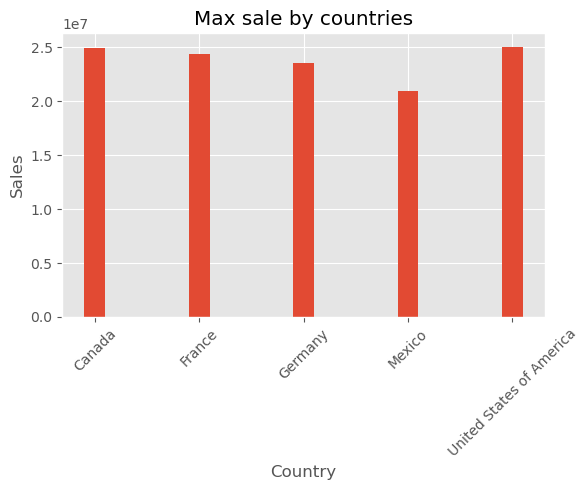

In [114]:
bar_width = 0.2
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
plt.bar(country['Country'], country['Sales'], bar_width)
plt.title('Max sale by countries')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.tight_layout()  # Add this line for better layout
plt.show()


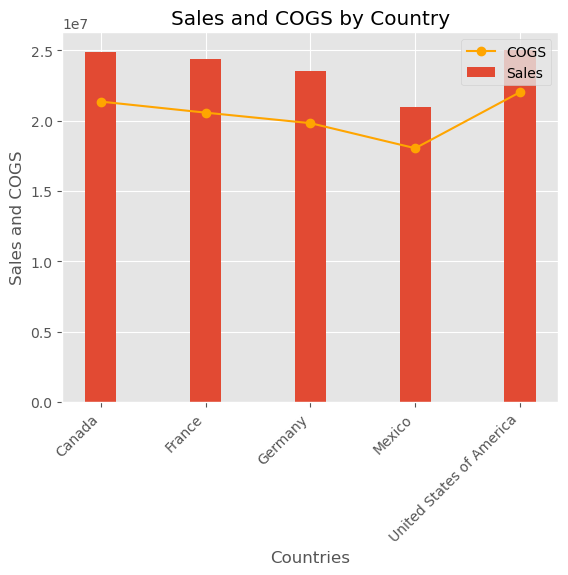

In [115]:
fig, ax = plt.subplots()
bar_width=0.3
index = np.arange(len(country['Country']))  # Use the actual column name 'Country'
bars = ax.bar(index, country['Sales'], label='Sales',width=bar_width)  # Added label for Sales
line = ax.plot(index, country['COGS'], label='COGS', marker='o',color='orange')  # Added label for COGS and marker for data points

ax.set_xlabel('Countries')
ax.set_ylabel('Sales and COGS')
ax.set_title('Sales and COGS by Country')  # Added a title
ax.set_xticks(index)  # Added this line to set x-tick positions
ax.set_xticklabels(country['Country'], rotation=45, ha='right')  # Rotated x-tick labels for better visibility
ax.legend()  # Added legend to differentiate Sales and COGS in the plot

plt.show()


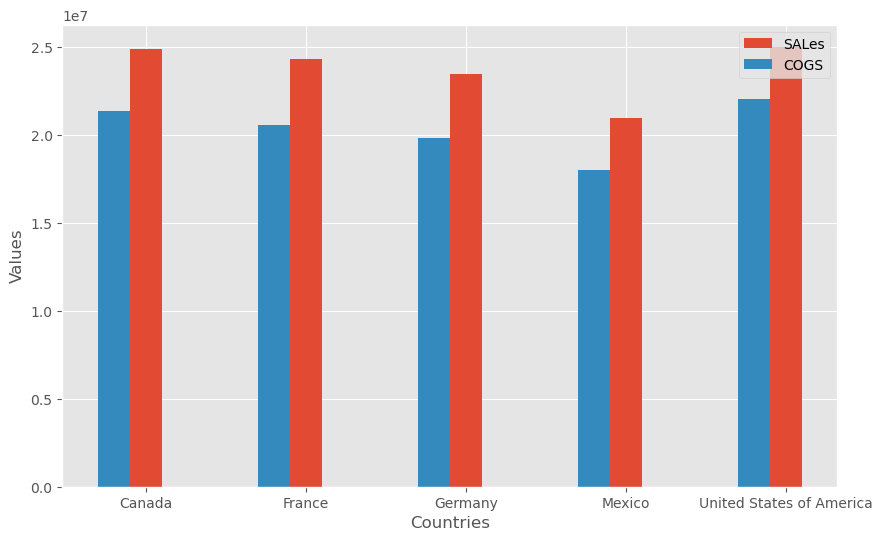

In [116]:
plt.figure(figsize=(10,6))
bar_width=0.2
x=np.arange(len(country))
plt.bar(x,country['Sales'],width=bar_width,label='SALes')
plt.bar(x-bar_width,country['COGS'],label='COGS',width=bar_width)
plt.xticks(x,country['Country'])
plt.xlabel('Countries')
plt.ylabel('Values')
plt.legend()
plt.show()

### since cost of gross sale is less than the total sales, that means the company is in profit

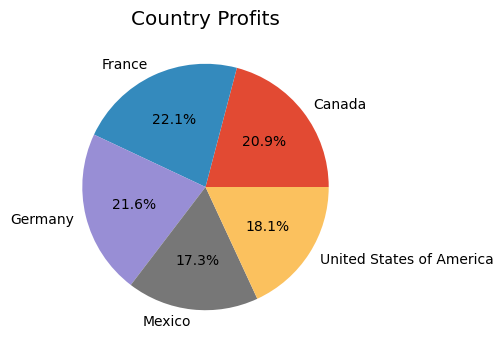

In [117]:
plt.figure(figsize=(4, 4))
plt.pie(country['Profit'], labels=country['Country'], autopct='%1.1f%%') #to get %age in piechart autopct='%1.1f%%'
plt.title('Country Profits')
plt.show()


In [118]:
prod=df.groupby('Product').agg({'Units Sold':'sum','Manufacturing Price':'mean','Sale Price':'mean','Gross Sales':'sum','Profit':'sum','COGS':'sum'}).reset_index()

In [119]:
prod

,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Profit,COGS
0,Amarilla,155315.0,260.0,128.680851,19037279.5,2936044.07,14933012.0
1,Carretera,146846.0,3.0,111.774194,14937520.5,2057914.89,11988503.0
2,Montana,154198.0,5.0,117.096774,16549834.5,2171281.13,13276047.0
3,Paseo,338239.5,10.0,108.178218,35611662.0,4917986.71,28213706.0
4,VTT,168783.0,250.0,138.587156,21968533.5,3156348.02,17477313.0
5,Velo,162424.5,120.0,115.238532,19826768.5,2431448.72,15944067.0


In [120]:
#Find Gross Margin by product
prod['gross margin']=prod['Sale Price']-prod['Manufacturing Price']
prod

,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Profit,COGS,gross margin
0,Amarilla,155315.0,260.0,128.680851,19037279.5,2936044.07,14933012.0,-131.319149
1,Carretera,146846.0,3.0,111.774194,14937520.5,2057914.89,11988503.0,108.774194
2,Montana,154198.0,5.0,117.096774,16549834.5,2171281.13,13276047.0,112.096774
3,Paseo,338239.5,10.0,108.178218,35611662.0,4917986.71,28213706.0,98.178218
4,VTT,168783.0,250.0,138.587156,21968533.5,3156348.02,17477313.0,-111.412844
5,Velo,162424.5,120.0,115.238532,19826768.5,2431448.72,15944067.0,-4.761468


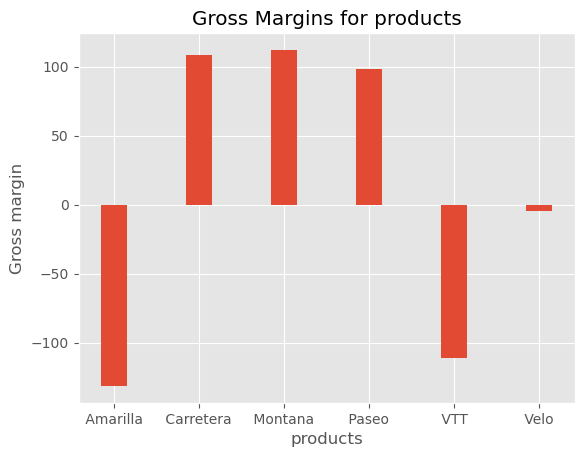

In [121]:
plt.figure()
bar_width=0.3
plt.bar(prod['Product'],prod['gross margin'],width=bar_width)
plt.xlabel('products')
plt.ylabel('Gross margin')
plt.title('Gross Margins for products')
plt.show()

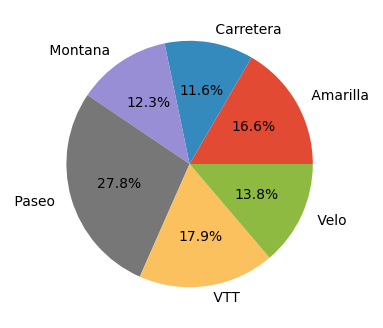

In [122]:
plt.figure(figsize=(4,4))
plt.pie(prod['Profit'],labels=prod['Product'],autopct='%1.1f%%')
plt.show()


### product Paseo has the highest profit in products

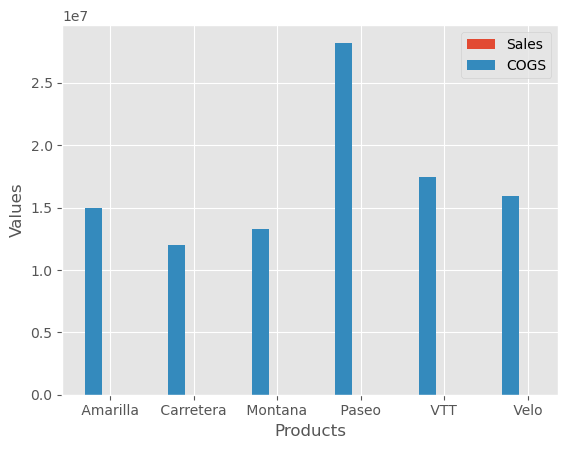

In [123]:
plt.figure()
x = np.arange(len(prod))
bar_width = 0.2

plt.bar(x,prod['Sale Price'], width=bar_width, label='Sales')
plt.bar(x-bar_width, prod['COGS'], label='COGS', width=bar_width)

plt.xticks(x, prod['Product'])  #plt.xticks to set the tick positions and labels
plt.ylabel('Values')
plt.xlabel('Products')
plt.legend()
plt.show()


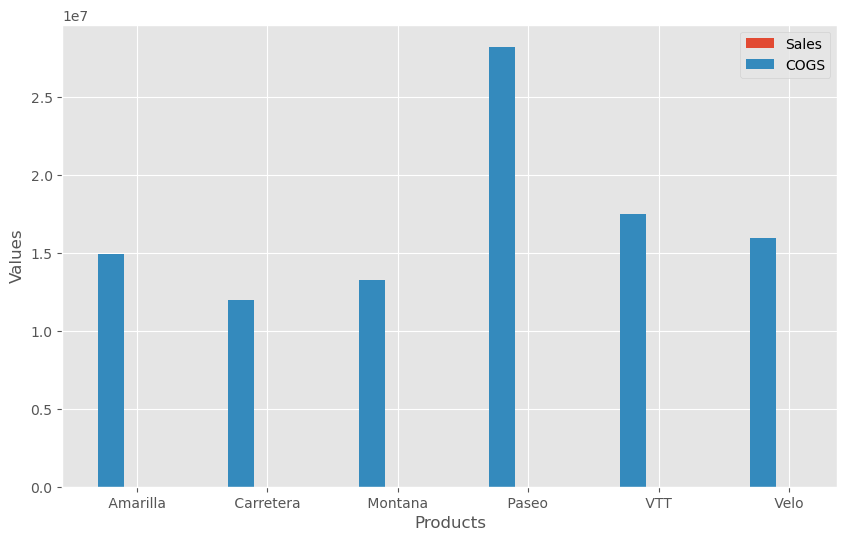

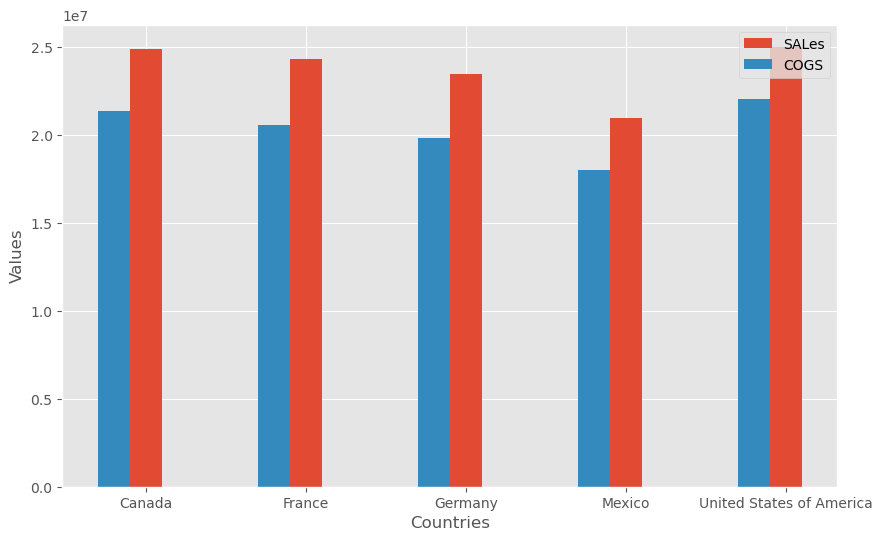

In [124]:
plt.figure(figsize=(10,6))
bar_width = 0.2
x = np.arange(len(prod))
plt.bar(x,prod['Sale Price'], width=bar_width, label='Sales')
plt.bar(x-bar_width, prod['COGS'], label='COGS', width=bar_width)
plt.xticks(x, prod['Product'])
plt.ylabel('Values')
plt.xlabel('Products')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
bar_width=0.2
x=np.arange(len(country))
plt.bar(x,country['Sales'],width=bar_width,label='SALes')
plt.bar(x-bar_width,country['COGS'],label='COGS',width=bar_width)
plt.xticks(x,country['Country'])
plt.xlabel('Countries')
plt.ylabel('Values')
plt.legend()
plt.show()



